In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from pykml import parser

In [3]:
class Eclipse2017(object):
    def __init__(self,fname='2017_eclipse.kml'):
        with open(fname) as fl:
            doc = parser.parse(fl)
        self.doc  = doc
        self.root = doc.getroot()
    
    def print_index(self):
        """
        Prints the names and indices of the folders and placemarks
        in the 2017 Eclipse KML File.
        """
        for fl_inx, folder in enumerate(self.root.Document.Folder):
            print '[{!s}] {}'.format(fl_inx,folder.name)
            if hasattr(folder,'Placemark'):
                for pm_inx,pm in enumerate(folder.Placemark):
                    print '    [{!s}] {}'.format(pm_inx,pm.name)
    
    def get_latlon(self,folder_inx=1,placemark_inx=1):
        """
        Return the (latitutes, longitudes) of the specified placemark
        index. Use print_index() for a directory of available 
        indices.
        
        Example:
        # Return lats and lons of Eclipse Central Umbral Line
        lat,lon = get_latlon(1,1)
        """
        
        str_coords   = self.root.Document.Folder[folder_inx].Placemark[placemark_inx].LineString.coordinates
        muxed_coords = str_coords.text.splitlines()[1].split()
        
        lats, lons = [],[]
        for mcrd in muxed_coords:
            lon,lat,alt = mcrd.split(',')
            lats.append(float(lat))
            lons.append(float(lon))
            
        return (np.array(lats),np.array(lons))
    
    def get_label(self,folder_inx,placemark_inx=None):
        
        if placemark_inx is None:
            label = self.root.Document.Folder[folder_inx].name
        else:
            label = self.root.Document.Folder[folder_inx].Placemark[placemark_inx].name

        return label

ecl = Eclipse2017()        

In [4]:
ecl.print_index()

[0] Greatest Eclipse Point
    [0] Greatest Eclipse Point
[1] TSE 2017 August 21 Umbral Path
    [0] Northern Limit
    [1] Central Line
    [2] Southern Limit
    [3] Umbra
[2] TSE 2017 August 21 Penumbral Limits
    [0] Penumbra Northern Limit
    [1] Penumbra Southern Limit
    [2] Sun Rise/Set Eastern Curve
    [3] Sun Rise/Set Western Curve
    [4] Maximum on Horizon Eastern Curve
    [5] Maximum on Horizon Western Curve
[3] TSE 2017 August 21 Equal Magnitude Curves
    [0] 0.2 Magnitude Northern Curve
    [1] 0.4 Magnitude Northern Curve
    [2] 0.6 Magnitude Northern Curve
    [3] 0.8 Magnitude Northern Curve
    [4] 0.2 Magnitude Southern Curve
    [5] 0.4 Magnitude Southern Curve
    [6] 0.6 Magnitude Southern Curve
    [7] 0.8 Magnitude Southern Curve
[4] TSE 2017 August 21 Maximum Eclipse Curves
    [0] Maximum Eclipse Curve 23:00UT
    [1] Maximum Eclipse Curve 23:30UT
    [2] Maximum Eclipse Curve 00:00UT
    [3] Maximum Eclipse Curve 00:30UT
    [4] Maximum Eclipse Curve 

In [5]:
folder_inx    = 4
placemark_inx = 3

label         = ecl.get_label(folder_inx,placemark_inx)
lats,lons     = ecl.get_latlon(folder_inx,placemark_inx)

In [6]:
print label
print lats
print lons

Maximum Eclipse Curve 00:30UT
[ 72.39474  72.39545  72.39597  72.39631  72.39645  72.3964   72.39617
  72.39574  72.39512  72.39431  72.39331  72.39212  72.39074  72.38917
  72.3874   72.38545  72.3833   72.38097  72.37844  72.37572  72.37281
  72.36971  72.36642  72.36294  72.35926  72.3554   72.35134  72.3471
  72.34266  72.33803  72.33321  72.3282   72.323    72.3176   72.31202
  72.30625  72.30028  72.29413  72.28778  72.28125  72.27452  72.2676
  72.2605   72.2532   72.24571  72.23804  72.23017  72.22212  72.21387
  72.20544  72.19682  72.18801  72.179    72.16982  72.16044  72.15087
  72.14112  72.13118  72.12105  72.11073  72.10022  72.08953  72.07865
  72.06759  72.05633  72.0449   72.03327  72.02146  72.00946  71.99728
  71.98491  71.97236  71.95962  71.9467   71.93359  71.9203   71.90683
  71.89317  71.87933  71.8653   71.8511   71.83671  71.82214  71.80738
  71.79245  71.77733  71.76203  71.74655  71.73089  71.71505  71.69904
  71.68284  71.66646  71.6499   71.63317  71.6162

## Map Demonstrations

In [7]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

from hamsci.gridsquare import *

height has been deprecated.



/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


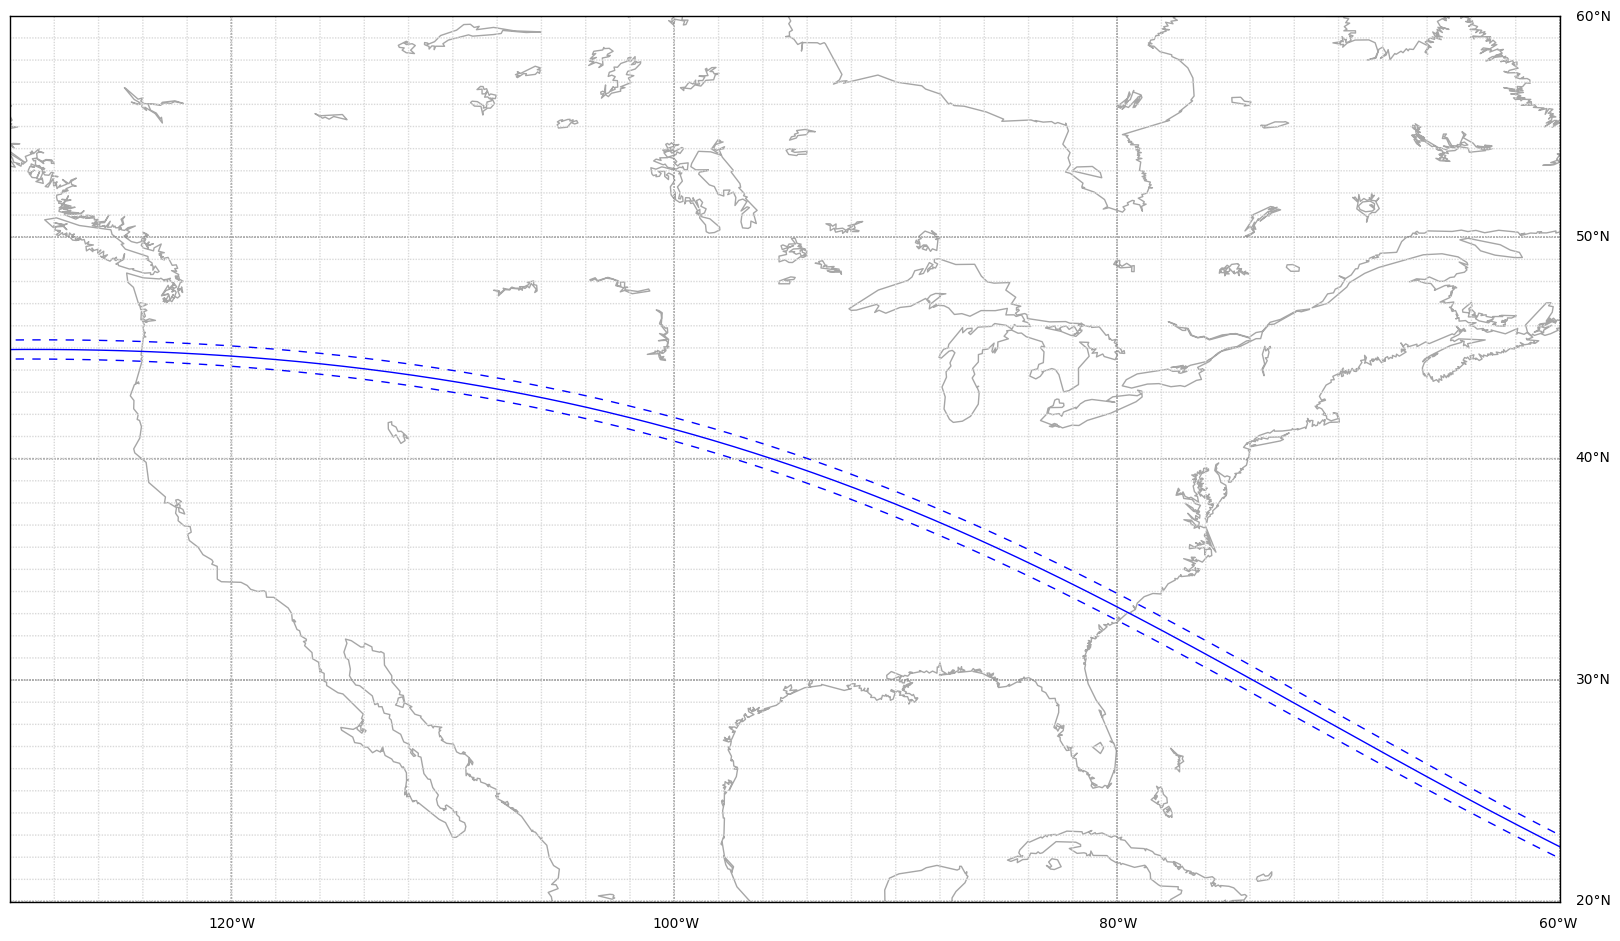

In [8]:
llcrnrlon = -130.
llcrnrlat =  20.
urcrnrlon =  -60.
urcrnrlat =   60.

fig = plt.figure(figsize=(20,15))
ax  = fig.add_subplot(111)
m   = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='l',area_thresh=1000.,projection='cyl',ax=ax)

# Draw Grid Squares
grid_grid = gridsquare_grid(2)
lats,lons = gridsquare2latlon(grid_grid,position='lower left')

m.drawparallels(lats[0,:],color='k',labels=[False,True,True,False])
m.drawmeridians(lons[:,0],color='k',labels=[True,False,False,True])
m.drawcoastlines(color='0.65')
m.drawmapboundary(fill_color='w')

# Add in the precision-4 grid.
grid_grid = gridsquare_grid(4)
lats,lons = gridsquare2latlon(grid_grid,position='lower left')

m.drawparallels(lats[0,:],color='0.85',labels=[False,False,False,False])
m.drawmeridians(lons[:,0],color='0.85',labels=[False,False,False,False])

#Eclipse Centerline
ec_color       = 'blue'
bound_style    = '--'

fl_inx, pm_inx = 1,1
label          = ecl.get_label(fl_inx,pm_inx)
lats,lons      = ecl.get_latlon(fl_inx,pm_inx)
m.plot(lons,lats,color=ec_color)

fl_inx, pm_inx = 1,0
label          = ecl.get_label(fl_inx,pm_inx)
lats,lons      = ecl.get_latlon(fl_inx,pm_inx)
m.plot(lons,lats,color=ec_color,ls=bound_style)

fl_inx, pm_inx = 1,2
label          = ecl.get_label(fl_inx,pm_inx)
lats,lons      = ecl.get_latlon(fl_inx,pm_inx)
m.plot(lons,lats,color=ec_color,ls=bound_style)

plt.show()